<a href="https://colab.research.google.com/github/GeorgeDavila/MachineLearningMiscellaneous/blob/master/LSTM_stock_price_Regression_using_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NOTE: This is in python 2, just because lstm.py uses python 2

And of course can be applied to other stocks

In [0]:
#Upload local file to this notebook
from google.colab import files
uploaded = files.upload() 

Saving lstm.py to lstm (4).py


In [0]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm as lstm, time #helper libraries

Using TensorFlow backend.


In [0]:
#Upload local file to this notebook
from google.colab import files
uploaded = files.upload() 

Saving sp500.csv to sp500 (3).csv


In [0]:
print (uploaded['sp500.csv'][:200].decode('utf-8') + '...') #Shows what the csv file looks like

1455.219971
1399.420044
1402.109985
1403.449951
1441.469971
1457.599976
1438.560059
1432.25
1449.680054
1465.150024
1455.140015
1455.900024
1445.569946
1441.359985
1401.530029
1410.0300...


In [0]:
#Step 1 load data 
X_train, y_train, X_test, y_test = lstm.load_data('sp500.csv', 50, True)

In [0]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print('compilation time : ', time.time() - start)

('compilation time : ', 0.027769088745117188)


In [0]:
#Step 3 Train the model
model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=1,
    validation_split=0.05)

Train on 3523 samples, validate on 186 samples
Epoch 1/1
3523/3523 [==============================] - 7s 2ms/step - loss: 0.0030 - val_loss: 8.1518e-04


yo


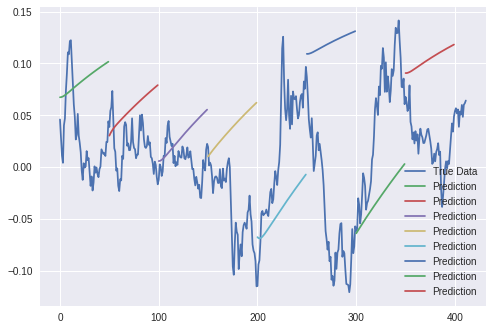

In [0]:
#Step 4 - Plot the predictions!
predictions = lstm.predict_sequences_multiple(model, X_test, 50, 50)
lstm.plot_results_multiple(predictions, y_test, 50)